In [1]:
import numpy as np
from robopianist import suite
from robopianist import music
from mujoco_utils import composer_utils
from robopianist.suite.tasks import piano_with_shadow_hands 
import note_seq
import pretty_midi
!export BOKEH_PY_LOG_LEVEL=critical

/home/ubuntu/miniconda3/envs/pianist/lib/python3.10/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
/home/ubuntu/miniconda3/envs/pianist/lib/python3.10/site-packages/bokeh/core/property/primitive.py:37: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  bokeh_bool_types += (np.bool8,)


In [2]:
from robopianist import music

In [2]:
!pip install --upgrade bokeh==2.4.3 

In [15]:
#chunk example 
from utils import utils

test_melody = "CMajorScaleOneHand"
midi = music.load(test_melody)

#note_seq.play_sequence(midi.seq)
print(midi.duration)


chunks = utils.get_overlapping_chunks_with_auto_overlap(midi, 5)

for i, chunk in enumerate(chunks):
    print(i, chunk.duration)
    #note_seq.play_sequence(chunk.seq)
    

7.5
0 5.0
1 5.0


In [8]:
chunks[0]

MidiFile(seq=notes {
  pitch: 72
  velocity: 80
  end_time: 0.5
}
notes {
  pitch: 74
  velocity: 80
  start_time: 0.5
  end_time: 1
  part: 1
}
notes {
  pitch: 76
  velocity: 80
  start_time: 1
  end_time: 1.5
  part: 2
}
notes {
  pitch: 77
  velocity: 80
  start_time: 1.5
  end_time: 2
}
notes {
  pitch: 79
  velocity: 80
  start_time: 2
  end_time: 2.5
  part: 1
}
notes {
  pitch: 81
  velocity: 80
  start_time: 2.5
  end_time: 3
  part: 2
}
notes {
  pitch: 83
  velocity: 80
  start_time: 3
  end_time: 3.5
  part: 3
}
notes {
  pitch: 84
  velocity: 80
  start_time: 3.5
  end_time: 4
  part: 4
}
notes {
  pitch: 83
  velocity: 80
  start_time: 4
  end_time: 4.5
  part: 3
}
notes {
  pitch: 81
  velocity: 80
  start_time: 4.5
  end_time: 5
  part: 2
}
total_time: 5
)

In [9]:
note_seq.plot_sequence(chunks[0].seq)

/home/ubuntu/miniconda3/envs/pianist/lib/python3.10/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


Loading BokehJS ...

/home/ubuntu/miniconda3/envs/pianist/lib/python3.10/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


/home/ubuntu/miniconda3/envs/pianist/lib/python3.10/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


/home/ubuntu/miniconda3/envs/pianist/lib/python3.10/site-packages/bokeh/io/notebook.py:487: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  publish_display_data(data, metadata, source, transient=transient, **kwargs)


In [16]:
etude_melodies = ["FrenchSuiteNo1Allemande", "FrenchSuiteNo5Sarabande", "PianoSonataD8451StMov", "PartitaNo26", 
                  "WaltzOp64No1", "BagatelleOp3No4", "KreislerianaOp16No8", "FrenchSuiteNo5Gavotte", 
                  "PianoSonataNo232NdMov", "GolliwoggsCakewalk", "PianoSonataNo21StMov", "PianoSonataK279InCMajor1StMov"]

available_melodies = ['TwinkleTwinkleLittleStar', 'CMajorScaleOneHand', 'CMajorScaleTwoHands', 'DMajorScaleOneHand', 
                       'DMajorScaleTwoHands', 'CMajorChordProgressionTwoHands', 'TwinkleTwinkleRousseau', 'NocturneRousseau']

all_chunks = []
chunk_duration = 2

for melody in available_melodies:
    midi = music.load(melody)
    chunks = utils.get_overlapping_chunks_with_auto_overlap(midi, chunk_duration)
    all_chunks.extend(chunks)


In [17]:
all_chunks[0].seq

notes {
  pitch: 60
  velocity: 80
  end_time: 0.5
}
notes {
  pitch: 60
  velocity: 80
  start_time: 0.5
  end_time: 1
}
notes {
  pitch: 67
  velocity: 80
  start_time: 1
  end_time: 1.5
  part: 2
}
notes {
  pitch: 67
  velocity: 80
  start_time: 1.5
  end_time: 2
  part: 2
}
total_time: 2

In [7]:
all_pitch = []

for chunk in all_chunks:
    for note in list(chunk.seq.notes):
        all_pitch.append(note.pitch)

In [8]:
len(set(all_pitch))

66

In [13]:
from robopianist import music

pig_melodies = music.PIG_MIDIS.copy()

print(len(pig_melodies))


all_chunks = []
chunk_duration = 5

for melody in pig_melodies:
    midi = music.load(melody)
    chunks = utils.get_overlapping_chunks_with_auto_overlap(midi, chunk_duration)
    all_chunks.extend(chunks)


all_pitch = []

for chunk in all_chunks:
    for note in list(chunk.seq.notes):
        all_pitch.append(note.pitch)


all_vels = []

for chunk in all_chunks:
    for note in list(chunk.seq.notes):
        all_vels.append(note.velocity)

0


In [10]:
np.min(all_pitch), np.max(all_pitch), np.mean(all_pitch)

(24, 102, 63.22934034070315)

In [11]:
np.min(all_vels), np.max(all_vels), np.mean(all_vels)

(1, 127, 68.25955056179775)

In [18]:
all_chunks[0].seq.notes

[pitch: 60
velocity: 80
end_time: 0.5
, pitch: 60
velocity: 80
start_time: 0.5
end_time: 1
, pitch: 67
velocity: 80
start_time: 1
end_time: 1.5
part: 2
, pitch: 67
velocity: 80
start_time: 1.5
end_time: 2
part: 2
]

In [49]:
import math
chunk_activations = []
for chunk in all_chunks:
    binary_pitch_matrix = np.zeros((128, 21))
    for note in list(chunk.seq.notes):
        round_start = int(note.start_time * 10)
        round_end = math.ceil(note.end_time * 10)
        for i in range(round_start, round_end):
            binary_pitch_matrix[note.pitch][i] = 1
    chunk_activations.append(binary_pitch_matrix.ravel()) 
chunk_activations = np.array(chunk_activations)

In [ ]:
chunk_activations = np.empty(len(all_chunks))
c = 0
for chunk in all_chunks:
    binary_pitch_matrix = np.zeros((128, 21))
    chunk_activations[c] = binary_pitch_matrix.ravel()
    c+=1

In [53]:
for i in range(len(chunk_activations)):
    print (sum(chunk_activations[i]))

20.0
20.0
20.0
20.0
20.0
24.0
24.0
20.0
40.0
48.0
48.0
40.0
20.0
24.0
24.0
20.0
40.0
48.0
48.0
40.0
80.0
80.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.0
40.0
40.0
38.0
46.0
0.0
0.0
0.0
0.0
5.0
46.0
68.0
59.0
57.0
68.0
62.0
67.0
64.0
54.0
57.0
64.0
61.0
59.0


In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(chunk_activations)
pca = PCA(n_components=2)
pca.fit(standardized_data)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

reduced_data = pca.transform(standardized_data)

Explained Variance Ratio: [0.06780308 0.06135046]


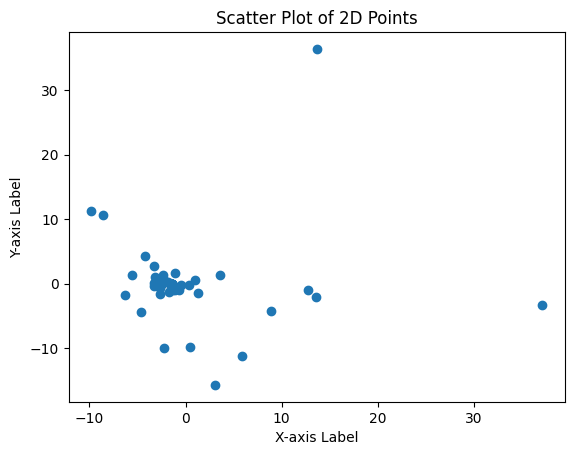

In [64]:
import matplotlib.pyplot as plt

x = [point[0] for point in reduced_data]
y = [point[1] for point in reduced_data]

plt.scatter(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot of 2D Points')

plt.show()